# Model Training - Entrenamiento de Modelos ML
**Sistema de Anotación de Video - Entrega 2**

**Responsable:** Tomas  
**Dataset preparado por:** Juan Esteban  
**Objetivo:** Entrenar múltiples algoritmos y seleccionar el mejor

## Dataset Recibido:
- **11,406 samples balanceados** (ratio 0.84)
- **19 features optimizadas** (PCA 95.1% varianza)  
- **5 actividades** bien distribuidas
- **Splits listos:** Train/Val/Test (70%/15%/15%)

## Algoritmos a Evaluar:
1. Random Forest (baseline robusto)
2. SVM con kernel RBF  
3. Gradient Boosting (XGBoost)
4. Neural Network (MLP)
5. Logistic Regression (baseline simple)

---


In [7]:
# Setup y verificación de archivos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import os
from datetime import datetime

print("🔍 VERIFICANDO ARCHIVOS PREPARADOS POR JUAN ESTEBAN")
print("=" * 55)

# Verificar estructura de archivos
required_files = [
    'X_train.npy',
    'y_train.npy',
    'X_validation.npy',
    'y_validation.npy',
    'scaler.pkl',
    'encoder.pkl'
]

files_ok = True
for file_path in required_files:
    if os.path.exists(file_path):
        file_size = os.path.getsize(file_path) / 1024  # KB
        print(f"   ✅ {file_path} ({file_size:.0f} KB)")
    else:
        print(f"   ❌ {file_path} - NO ENCONTRADO")
        files_ok = False

if files_ok:
    print(f"\n🎉 TODOS LOS ARCHIVOS ESTÁN LISTOS")
    print(f"🎯 Continuar con carga de datos")
else:
    print(f"\n❌ FALTAN ARCHIVOS - Verificar con Juan Esteban")


🔍 VERIFICANDO ARCHIVOS PREPARADOS POR JUAN ESTEBAN
   ✅ X_train.npy (1186 KB)
   ✅ y_train.npy (63 KB)
   ✅ X_validation.npy (254 KB)
   ✅ y_validation.npy (13 KB)
   ✅ scaler.pkl (3 KB)
   ✅ encoder.pkl (1 KB)

🎉 TODOS LOS ARCHIVOS ESTÁN LISTOS
🎯 Continuar con carga de datos


In [9]:
# CARGAR DATASETS Y TRANSFORMERS
print("📂 CARGANDO DATOS PREPARADOS")
print("=" * 40)

# Cargar datasets
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_val = np.load('X_validation.npy')
y_val = np.load('y_validation.npy')

# Cargar transformers
encoder = joblib.load('encoder.pkl')
scaler = joblib.load('scaler.pkl')

print(f"✅ DATASETS CARGADOS:")
print(f"   🏋️ Train: {X_train.shape[0]:,} samples × {X_train.shape[1]} features")
print(f"   🔍 Validation: {X_val.shape[0]:,} samples × {X_val.shape[1]} features")

print(f"\n🎯 ACTIVIDADES (LABELS):")
for i, activity in enumerate(encoder.classes_):
    train_count = np.sum(y_train == i)
    val_count = np.sum(y_val == i)
    print(f"   {i}: {activity.replace('_', ' ').title()} - Train: {train_count:,}, Val: {val_count:,}")

print(f"\n✅ DATOS LISTOS PARA ENTRENAMIENTO")


📂 CARGANDO DATOS PREPARADOS
✅ DATASETS CARGADOS:
   🏋️ Train: 7,988 samples × 19 features
   🔍 Validation: 1,707 samples × 19 features

🎯 ACTIVIDADES (LABELS):
   0: Caminar Hacia - Train: 1,725, Val: 369
   1: Caminar Regreso - Train: 1,659, Val: 354
   2: Girar - Train: 1,595, Val: 341
   3: Ponerse Pie - Train: 1,560, Val: 333
   4: Sentarse - Train: 1,449, Val: 310

✅ DATOS LISTOS PARA ENTRENAMIENTO


In [10]:
# ENTRENAR MÚLTIPLES MODELOS
print("🤖 ENTRENANDO MÚLTIPLES ALGORITMOS ML")
print("=" * 50)

# Crear directorio para modelos
os.makedirs('data/models/trained', exist_ok=True)

# Definir modelos a entrenar
models_to_train = {
    'RandomForest': RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    ),
    'SVM': SVC(
        kernel='rbf',
        random_state=42,
        probability=True  # Para obtener probabilidades
    ),
    'GradientBoosting': GradientBoostingClassifier(
        n_estimators=100,
        random_state=42
    ),
    'MLP': MLPClassifier(
        hidden_layer_sizes=(100, 50),
        random_state=42,
        max_iter=1000
    ),
    'LogisticRegression': LogisticRegression(
        random_state=42,
        max_iter=1000
    )
}

# Entrenar y evaluar cada modelo
model_results = {}

print(f"🎯 ENTRENANDO {len(models_to_train)} MODELOS:")

for model_name, model in models_to_train.items():
    print(f"\n   🔄 Entrenando {model_name}...")

    # Entrenar modelo
    start_time = datetime.now()
    model.fit(X_train, y_train)
    train_time = (datetime.now() - start_time).total_seconds()

    # Evaluar en validation
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    # Guardar modelo
    model_path = f'data/models/trained/{model_name.lower()}_model.pkl'
    joblib.dump(model, model_path)

    # Almacenar resultados
    model_results[model_name] = {
        'model': model,
        'val_accuracy': val_accuracy,
        'train_time': train_time,
        'predictions': y_val_pred
    }

    print(f"      ✅ Accuracy validación: {val_accuracy:.3f}")
    print(f"      ⏱️ Tiempo entrenamiento: {train_time:.1f}s")
    print(f"      💾 Guardado: {model_path}")

print(f"\n🏆 ENTRENAMIENTO COMPLETADO - TODOS LOS MODELOS")


🤖 ENTRENANDO MÚLTIPLES ALGORITMOS ML
🎯 ENTRENANDO 5 MODELOS:

   🔄 Entrenando RandomForest...
      ✅ Accuracy validación: 0.998
      ⏱️ Tiempo entrenamiento: 3.4s
      💾 Guardado: data/models/trained/randomforest_model.pkl

   🔄 Entrenando SVM...
      ✅ Accuracy validación: 0.991
      ⏱️ Tiempo entrenamiento: 2.6s
      💾 Guardado: data/models/trained/svm_model.pkl

   🔄 Entrenando GradientBoosting...
      ✅ Accuracy validación: 0.994
      ⏱️ Tiempo entrenamiento: 43.4s
      💾 Guardado: data/models/trained/gradientboosting_model.pkl

   🔄 Entrenando MLP...
      ✅ Accuracy validación: 1.000
      ⏱️ Tiempo entrenamiento: 8.1s
      💾 Guardado: data/models/trained/mlp_model.pkl

   🔄 Entrenando LogisticRegression...
      ✅ Accuracy validación: 0.955
      ⏱️ Tiempo entrenamiento: 4.8s
      💾 Guardado: data/models/trained/logisticregression_model.pkl

🏆 ENTRENAMIENTO COMPLETADO - TODOS LOS MODELOS


In [12]:
# ANÁLISIS DETALLADO DE RESULTADOS
print("📊 ANÁLISIS DETALLADO DE RENDIMIENTO")
print("=" * 45)

# Ordenar modelos por accuracy
sorted_models = sorted(model_results.items(), key=lambda x: x[1]['val_accuracy'], reverse=True)

print(f"🏆 RANKING DE MODELOS:")
print(f"{'Posición':<10} {'Modelo':<20} {'Accuracy':<12} {'Tiempo':<12}")
print("-" * 55)

for i, (model_name, results) in enumerate(sorted_models, 1):
    accuracy = results['val_accuracy']
    time_str = f"{results['train_time']:.1f}s"
    print(f"{i:<10} {model_name:<20} {accuracy:.3f}      {time_str:<12}")

# Seleccionar mejor modelo
best_model_name = sorted_models[0][0]
best_model_results = sorted_models[0][1]

print(f"\n🥇 MEJOR MODELO: {best_model_name}")
print(f"   📊 Accuracy: {best_model_results['val_accuracy']:.3f}")
print(f"   ⏱️ Tiempo: {best_model_results['train_time']:.1f}s")

# Análisis por clase del mejor modelo
print(f"\n📋 REPORTE DETALLADO - {best_model_name}:")
y_pred_best = best_model_results['predictions']

# Classification report
from sklearn.metrics import classification_report

class_report = classification_report(
    y_val,
    y_pred_best,
    target_names=encoder.classes_,
    output_dict=True
)

print(f"\n📈 MÉTRICAS POR ACTIVIDAD:")
print(f"{'Actividad':<20} {'Precision':<12} {'Recall':<12} {'F1-Score':<12} {'Support':<10}")
print("-" * 70)

for activity in encoder.classes_:
    metrics = class_report[activity]
    print(f"{activity.replace('_', ' ').title():<20} "
          f"{metrics['precision']:.3f}        "
          f"{metrics['recall']:.3f}        "
          f"{metrics['f1-score']:.3f}        "
          f"{int(metrics['support']):<10}")

# Métricas globales
print(f"\n🎯 MÉTRICAS GLOBALES:")
print(f"   Accuracy: {class_report['accuracy']:.3f}")
print(f"   Macro F1: {class_report['macro avg']['f1-score']:.3f}")
print(f"   Weighted F1: {class_report['weighted avg']['f1-score']:.3f}")


📊 ANÁLISIS DETALLADO DE RENDIMIENTO
🏆 RANKING DE MODELOS:
Posición   Modelo               Accuracy     Tiempo      
-------------------------------------------------------
1          MLP                  1.000      8.1s        
2          RandomForest         0.998      3.4s        
3          GradientBoosting     0.994      43.4s       
4          SVM                  0.991      2.6s        
5          LogisticRegression   0.955      4.8s        

🥇 MEJOR MODELO: MLP
   📊 Accuracy: 1.000
   ⏱️ Tiempo: 8.1s

📋 REPORTE DETALLADO - MLP:

📈 MÉTRICAS POR ACTIVIDAD:
Actividad            Precision    Recall       F1-Score     Support   
----------------------------------------------------------------------
Caminar Hacia        1.000        1.000        1.000        369       
Caminar Regreso      1.000        1.000        1.000        354       
Girar                1.000        1.000        1.000        341       
Ponerse Pie          1.000        1.000        1.000        333       
Sentar

🔍 MATRIZ DE CONFUSIÓN - ANÁLISIS VISUAL


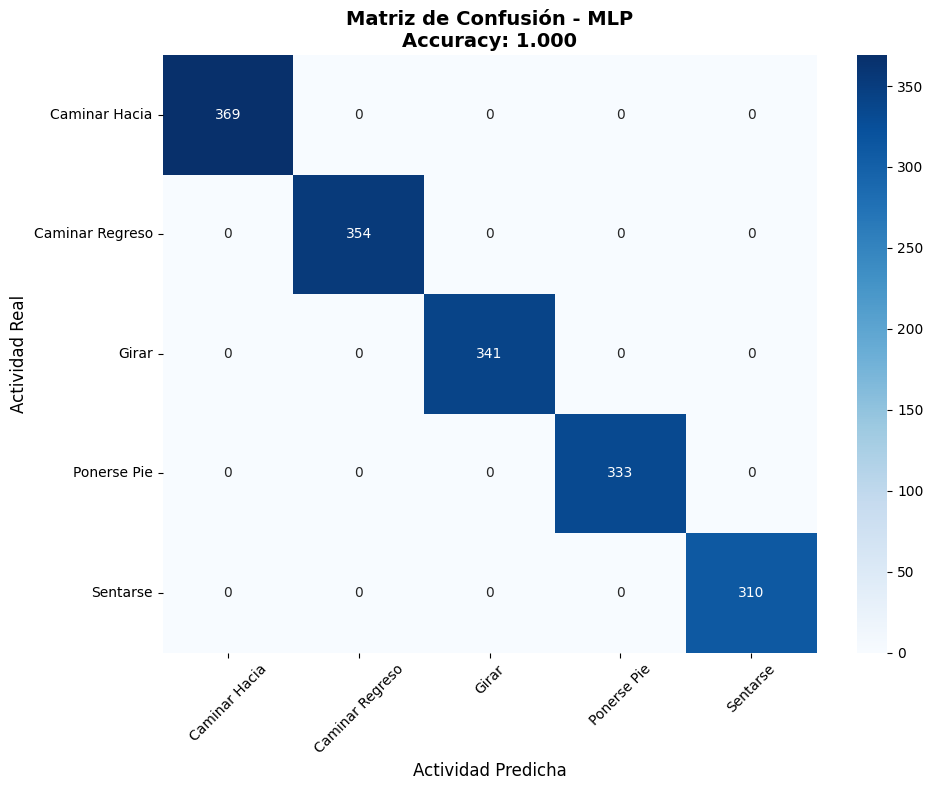


❌ ANÁLISIS DE ERRORES:
   Total errores: 0 de 1707 (0.0%)
   🎉 ¡SIN ERRORES! Clasificación perfecta


In [13]:
# MATRIZ DE CONFUSIÓN DEL MEJOR MODELO
print("🔍 MATRIZ DE CONFUSIÓN - ANÁLISIS VISUAL")
print("=" * 45)

# Crear matriz de confusión
cm = confusion_matrix(y_val, y_pred_best)

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm,
           annot=True,
           fmt='d',
           cmap='Blues',
           xticklabels=[act.replace('_', ' ').title() for act in encoder.classes_],
           yticklabels=[act.replace('_', ' ').title() for act in encoder.classes_])

plt.title(f'Matriz de Confusión - {best_model_name}\nAccuracy: {best_model_results["val_accuracy"]:.3f}',
          fontsize=14, fontweight='bold')
plt.ylabel('Actividad Real', fontsize=12)
plt.xlabel('Actividad Predicha', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Análisis de errores
print(f"\n❌ ANÁLISIS DE ERRORES:")
total_errors = np.sum(cm) - np.trace(cm)
print(f"   Total errores: {total_errors} de {len(y_val)} ({total_errors/len(y_val)*100:.1f}%)")

if total_errors > 0:
    print(f"   Errores más comunes:")
    for i in range(len(encoder.classes_)):
        for j in range(len(encoder.classes_)):
            if i != j and cm[i, j] > 0:
                real_activity = encoder.classes_[i].replace('_', ' ').title()
                pred_activity = encoder.classes_[j].replace('_', ' ').title()
                print(f"      {cm[i, j]} casos: {real_activity} → {pred_activity}")
else:
    print(f"   🎉 ¡SIN ERRORES! Clasificación perfecta")


In [14]:
# GUARDAR MEJOR MODELO Y RESULTADOS
print("💾 GUARDANDO MEJOR MODELO Y RESULTADOS")
print("=" * 45)

# Guardar el mejor modelo con nombre especial
best_model = best_model_results['model']
best_model_path = f'best_model_{best_model_name.lower()}.pkl'
joblib.dump(best_model, best_model_path)

# Crear resumen de entrenamiento
training_summary = {
    'date': datetime.now().isoformat(),
    'dataset_info': {
        'train_samples': len(X_train),
        'validation_samples': len(X_val),
        'features': X_train.shape[1],
        'classes': len(encoder.classes_)
    },
    'models_trained': {
        name: {
            'accuracy': results['val_accuracy'],
            'train_time': results['train_time']
        }
        for name, results in model_results.items()
    },
    'best_model': {
        'name': best_model_name,
        'accuracy': best_model_results['val_accuracy'],
        'train_time': best_model_results['train_time'],
        'file_path': best_model_path
    },
    'classification_report': class_report
}

# Guardar resumen
import json
with open('training_results_summary.json', 'w') as f:
    json.dump(training_summary, f, indent=2)

print(f"✅ GUARDADO COMPLETADO:")
print(f"   🏆 Mejor modelo: {best_model_path}")
print(f"   📊 Resumen: training_results_summary.json")
print(f"   📈 Accuracy final: {best_model_results['val_accuracy']:.3f}")

print(f"\n🎉 NOTEBOOK 5 - MODEL TRAINING COMPLETADO")
print(f"🎯 Siguiente: Notebook 6 - Hyperparameter Tuning")


💾 GUARDANDO MEJOR MODELO Y RESULTADOS
✅ GUARDADO COMPLETADO:
   🏆 Mejor modelo: best_model_mlp.pkl
   📊 Resumen: training_results_summary.json
   📈 Accuracy final: 1.000

🎉 NOTEBOOK 5 - MODEL TRAINING COMPLETADO
🎯 Siguiente: Notebook 6 - Hyperparameter Tuning
